### Name: Aafaq Iqbal Khan,                                Student ID: x20108851

# Steps
    1) Import libraries

    2) Load JSON file

    3) Push JSON file into MongoDB

    4) Retrieve files from MongoBD into Dataframe

    5) Drop Irrelevant columns

    6) Join 2 datasets 

    7) Modify the columns into appropiate Data tyes

    8) Label Encoding of Categorical variables

    9) Dealing with null values

    10) Distribution Visualisation and Outliers dealing

    11) Storing Structured Data into PostgreSQL

    12) Descriptive Analysis of Data

In [72]:
#Importing relevant libraries 

import json
import pymongo
import pandas as pd
import os
import pandas.io.sql as sqlio
import psycopg2

#Importing visualisation libraries 
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#for encoding categorical variables 
from sklearn.preprocessing import LabelEncoder
 
#Importing basic libraries 
import math
import scipy.stats as stats
import pylab


In [73]:
from pymongo import MongoClient
client = MongoClient(host = '192.168.56.30:27017')

In [74]:
db = client['test8_database']

In [75]:
collection4 = db['COVID-19_deaths_by_race_and_Hispanic_group-collection']

In [76]:
collection5 = db['Conditions_contributing_to_deaths_involving_COVID-19-collection']

### Load JSON files 

In [11]:
import json
dict_data = []
headers = []
with open("Deaths_involving_coronavirus_disease_2019__COVID-19__by_race_and_Hispanic_origin_group_and_age__by_state.json") as f:
    json_data = json.load(f)
    for val in json_data["meta"]["view"]["columns"]:
        headers.append(val["name"])
    for val in json_data["data"]:
        row = {}
        for i in range(len(val)):
            row[headers[i]] = val[i]
        dict_data.append(row)

# print(dict_data)
print(len(dict_data))

6489


Insert JSON file into MongoDB Collection 

In [13]:
#collection4.insert_many(dict_data)
if(collection4.count() == 0):
    collection4.insert_many(dict_data)
elif(collection4.count() > 0):
    print("Collection already has data")

Collection already has data


<ipython-input-13-9e834ea7a607>:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  if(collection4.count() == 0):
<ipython-input-13-9e834ea7a607>:4: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  elif(collection4.count() > 0):


Load second JSON file and insert into another colection in database

In [14]:
dict_data = []
headers = []
with open("Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group_and_state__United_States.json", encoding='utf8') as f:
    json_data = json.load(f)
    for val in json_data["meta"]["view"]["columns"]:
        headers.append(val["name"])
    for val in json_data["data"]:
        row = {}
        for i in range(len(val)):
            row[headers[i]] = val[i]
        dict_data.append(row)

# print(dict_data)
print(len(dict_data))

235980


In [15]:
#collection5.insert_many(dict_data)
if(collection5.count() == 0):
    collection5.insert_many(dict_data)
elif(collection5.count() > 0):
    print("Collection already has data")

Collection already has data


<ipython-input-15-d0f533771ebb>:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  if(collection5.count() == 0):
<ipython-input-15-d0f533771ebb>:4: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  elif(collection5.count() > 0):


Retrieve the data from MongoDB collection by using find() function and store into pandas dataframe

In [77]:
df_deaths_by_race = pd.DataFrame(list(collection4.find()))

In [78]:
df_Conditions_contributing_to_deaths = pd.DataFrame(list(collection5.find()))

In [18]:
df_Conditions_contributing_to_deaths.head()

,_id,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Data As Of,...,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,606e309025a5cb447cbed53c,row-bb4i~3f8k.wfuf,00000000-0000-0000-1E12-3FD61F1FFF49,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,350,362,None
1,606e309025a5cb447cbed53d,row-g7b4.72zd_ivca,00000000-0000-0000-56A1-C28C79B25B89,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1603,1639,None
2,606e309025a5cb447cbed53e,row-rniz~caqk_eecx,00000000-0000-0000-AFA8-640BE9B7C5E2,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,4314,4422,None
3,606e309025a5cb447cbed53f,row-j78h_x6ty.kbkp,00000000-0000-0000-1521-0AE99D708FC3,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,12922,13272,None
4,606e309025a5cb447cbed540,row-ctxw_tbim-4tyr,00000000-0000-0000-0C79-564CAC4DAA68,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,33277,34129,None


In [19]:
df_deaths_by_race.head()

,_id,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Data as of,...,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,606e2f3025a5cb447cbebbe2,row-czuu~ub9b_59ux,00000000-0000-0000-6D86-7F20A72018AC,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,All Ages,Total Deaths,539723,4160118,466386,263173,9031,750721,None
1,606e2f3025a5cb447cbebbe3,row-ypps-279h~m7ar,00000000-0000-0000-471C-6E3702D46824,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,All Ages,Non-Hispanic White,328239,3047347,301454,149830,6038,485501,None
2,606e2f3025a5cb447cbebbe4,row-b8zs_kvf6_8e6u,00000000-0000-0000-6DF3-0A215265E02C,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,Under 1 year,Non-Hispanic White,14,9139,98,1,10,121,None
3,606e2f3025a5cb447cbebbe5,row-i726_3t48~vrkt,00000000-0000-0000-E2E3-EDFA24295CA7,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,0-17 years,Non-Hispanic White,72,16860,287,14,84,429,None
4,606e2f3025a5cb447cbebbe6,row-hnsv.anpj~2g9m,00000000-0000-0000-B6C2-8821981747BF,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,1-4 years,Non-Hispanic White,12,1802,59,2,25,94,None


In [20]:
df_Conditions_contributing_to_deaths.shape

(235980, 23)

#### check Dataframe Columns

In [21]:
df_deaths_by_race.columns

Index(['_id', 'sid', 'id', 'position', 'created_at', 'created_meta',
       'updated_at', 'updated_meta', 'meta', 'Data as of', 'Start Date',
       'End Date', 'State', 'Age group', 'Race and Hispanic Origin Group',
       'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

In [22]:
df_Conditions_contributing_to_deaths.columns

Index(['_id', 'sid', 'id', 'position', 'created_at', 'created_meta',
       'updated_at', 'updated_meta', 'meta', 'Data As Of', 'Start Date',
       'End Date', 'Group', 'Year', 'Month', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

#### Drop the irrelevant attributes from both dataframes

In [79]:
to_drop= ['_id','sid', 'id', 'position', 'created_at', 'created_meta',
       'updated_at', 'updated_meta', 'meta','Footnote']
df_deaths_by_race.drop(columns=to_drop, inplace=True)
df_deaths_by_race.columns

Index(['Data as of', 'Start Date', 'End Date', 'State', 'Age group',
       'Race and Hispanic Origin Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths'],
      dtype='object')

As 'Age Group' and 'State' are already present in our first dataframe so we will drop it from our second dataframe as well

In [80]:
to_drop= ['_id','sid', 'id', 'position', 'created_at', 'created_meta',
       'updated_at', 'updated_meta', 'meta','Age Group','State', 'Number of Mentions', 'Flag', 'Year','Month']
df_Conditions_contributing_to_deaths.drop(columns=to_drop, inplace=True)
df_Conditions_contributing_to_deaths.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Condition Group',
       'Condition', 'ICD10_codes', 'COVID-19 Deaths'],
      dtype='object')

In [25]:
print(df_Conditions_contributing_to_deaths.shape, df_deaths_by_race.shape)

(235980, 8) (6489, 12)


#### Check unique values of Start Date culmuns of each dataframe

In [81]:
print("Unique Start Dates in df__deaths_by_race = ", df_deaths_by_race['Start Date'].unique())

print("\n\nUnique Start Dates in df__Conditions_contributing_to_deaths = ", df_Conditions_contributing_to_deaths['Start Date'].unique())

Unique Start Dates in df__deaths_by_race =  ['2020-01-01T00:00:00']


Unique Start Dates in df__Conditions_contributing_to_deaths =  ['2020-01-01T00:00:00' '2021-01-01T00:00:00' '2020-02-01T00:00:00'
 '2020-03-01T00:00:00' '2020-04-01T00:00:00' '2020-05-01T00:00:00'
 '2020-06-01T00:00:00' '2020-07-01T00:00:00' '2020-08-01T00:00:00'
 '2020-09-01T00:00:00' '2020-10-01T00:00:00' '2020-11-01T00:00:00'
 '2020-12-01T00:00:00' '2021-02-01T00:00:00' '2021-03-01T00:00:00'
 '2021-04-01T00:00:00']


Select only those records that have starting survey date is 01 January 2020

In [82]:
df_Conditions_contributing_to_deaths=df_Conditions_contributing_to_deaths[df_Conditions_contributing_to_deaths["Start Date"]=='2020-01-01T00:00:00']

In [83]:
print(df_Conditions_contributing_to_deaths.shape, df_deaths_by_race.shape)

(37260, 8) (6489, 12)


In [84]:
print("Unique Start Dates in df__deaths_by_race = ", df_deaths_by_race['Start Date'].unique())

print("\n\nUnique Start Dates in df__Conditions_contributing_to_deaths = ", df_Conditions_contributing_to_deaths['Start Date'].unique())

Unique Start Dates in df__deaths_by_race =  ['2020-01-01T00:00:00']


Unique Start Dates in df__Conditions_contributing_to_deaths =  ['2020-01-01T00:00:00']


### Join the both dataframes by inner join

In [86]:
df_combine = df_deaths_by_race.join(df_Conditions_contributing_to_deaths,rsuffix='_conditions')

In [87]:
df_combine.shape

(6489, 20)

In [88]:
df_combine.head()

,Data as of,Start Date,End Date,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Data As Of,Start Date_conditions,End Date_conditions,Group,Condition Group,Condition,ICD10_codes,COVID-19 Deaths_conditions
0,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,All Ages,Total Deaths,539723,4160118,466386,263173,9031,750721,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,350
1,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,All Ages,Non-Hispanic White,328239,3047347,301454,149830,6038,485501,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,1603
2,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,Under 1 year,Non-Hispanic White,14,9139,98,1,10,121,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,4314
3,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,0-17 years,Non-Hispanic White,72,16860,287,14,84,429,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,12922
4,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,1-4 years,Non-Hispanic White,12,1802,59,2,25,94,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,33277


Data Types of combine dataframe

In [33]:
df_combine.dtypes

Data as of                                  object
Start Date                                  object
End Date                                    object
State                                       object
Age group                                   object
Race and Hispanic Origin Group              object
COVID-19 Deaths                             object
Total Deaths                                object
Pneumonia Deaths                            object
Pneumonia and COVID-19 Deaths               object
Influenza Deaths                            object
Pneumonia, Influenza, or COVID-19 Deaths    object
Data As Of                                  object
Start Date_conditions                       object
End Date_conditions                         object
Group                                       object
Condition Group                             object
Condition                                   object
ICD10_codes                                 object
COVID-19 Deaths_conditions     

As we can see all columns have object type and not much information is presented by describe function so we have convert the columns into appropiate datatypes before further pre-processing   

In [89]:
df_combine[['COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths','COVID-19 Deaths_conditions']]= df_combine[['COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'COVID-19 Deaths_conditions' ]].apply(pd.to_numeric)

In [35]:
df_combine.dtypes

Data as of                                   object
Start Date                                   object
End Date                                     object
State                                        object
Age group                                    object
Race and Hispanic Origin Group               object
COVID-19 Deaths                             float64
Total Deaths                                float64
Pneumonia Deaths                            float64
Pneumonia and COVID-19 Deaths               float64
Influenza Deaths                            float64
Pneumonia, Influenza, or COVID-19 Deaths    float64
Data As Of                                   object
Start Date_conditions                        object
End Date_conditions                          object
Group                                        object
Condition Group                              object
Condition                                    object
ICD10_codes                                  object
COVID-19 Dea

#### Label Encoding of Categorical variables by sing sci-kit learn library approach:

In [92]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column

df_combine['State_Cat'] = labelencoder.fit_transform(df_combine['State'].astype(str))
df_combine['Age group_Cat'] = labelencoder.fit_transform(df_combine['Age group'].astype(str))
df_combine['Race and Hispanic Origin Group_Cat'] = labelencoder.fit_transform(df_combine['Race and Hispanic Origin Group'].astype(str))
df_combine['Condition Group_Cat'] = labelencoder.fit_transform(df_combine['Condition Group'].astype(str))
df_combine['Condition_Cat'] = labelencoder.fit_transform(df_combine['Condition'].astype(str))

  
df_combine.head()

,Data as of,Start Date,End Date,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,...,Group,Condition Group,Condition,ICD10_codes,COVID-19 Deaths_conditions,State_Cat,Age group_Cat,Race and Hispanic Origin Group_Cat,Condition Group_Cat,Condition_Cat
0,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,All Ages,Total Deaths,539723.0,4160118.0,466386.0,263173.0,...,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,350.0,46,14,7,9,11
1,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,All Ages,Non-Hispanic White,328239.0,3047347.0,301454.0,149830.0,...,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,1603.0,46,14,6,9,11
2,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,Under 1 year,Non-Hispanic White,14.0,9139.0,98.0,1.0,...,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,4314.0,46,15,6,9,11
3,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,0-17 years,Non-Hispanic White,72.0,16860.0,287.0,14.0,...,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,12922.0,46,0,6,9,11
4,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,1-4 years,Non-Hispanic White,12.0,1802.0,59.0,2.0,...,By Total,Respiratory diseases,Influenza and pneumonia,J09-J18,33277.0,46,1,6,9,11


### Dealing with null values

In [91]:
df_combine.isnull().sum()

Data as of                                     0
Start Date                                     0
End Date                                       0
State                                          0
Age group                                      0
Race and Hispanic Origin Group                 0
COVID-19 Deaths                             1730
Total Deaths                                1684
Pneumonia Deaths                            1923
Pneumonia and COVID-19 Deaths               1505
Influenza Deaths                            1229
Pneumonia, Influenza, or COVID-19 Deaths    1998
Data As Of                                     0
Start Date_conditions                          0
End Date_conditions                            0
Group                                          0
Condition Group                                0
Condition                                      0
ICD10_codes                                    0
COVID-19 Deaths_conditions                  1282
State_Cat           

#### The summary of all features in combine dataframe

In [38]:
pd.set_option('display.max_rows', df_combine.shape[0]+1)
df_combine.describe(include = 'all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Data as of,6489,1,2021-04-07T00:00:00,6489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start Date,6489,1,2020-01-01T00:00:00,6489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End Date,6489,1,2021-04-03T00:00:00,6489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,6489,54,United States,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age group,6489,16,25-34 years,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race and Hispanic Origin Group,6489,9,Non-Hispanic American Indian or Alaska Native,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COVID-19 Deaths,4759,NaN,NaN,NaN,497.385,9756.12,0,0,0,32,539723
Total Deaths,4805,NaN,NaN,NaN,3914.09,78444.3,0,14,58,406,4.16012e+06
Pneumonia Deaths,4566,NaN,NaN,NaN,450.758,8710.02,0,0,0,32,466386
Pneumonia and COVID-19 Deaths,4984,NaN,NaN,NaN,232.546,4581.34,0,0,0,13,263173


The 'ICD10_codes' are just code does not depict any useful information so we dropped them also

In [39]:
to_drop= ['Data as of', 'Start Date', 'End Date', 'Data As Of', 'Start Date_conditions', 'End Date_conditions', 'Group', 'ICD10_codes']

In [40]:
df_combine.drop(columns=to_drop, inplace=True)
df_combine.head()

,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Condition Group,Condition,COVID-19 Deaths_conditions,State_Cat,Age group_Cat,Race and Hispanic Origin Group_Cat,Condition Group_Cat,Condition_Cat
0,United States,All Ages,Total Deaths,539723.0,4160118.0,466386.0,263173.0,9031.0,750721.0,Respiratory diseases,Influenza and pneumonia,350.0,46,14,7,9,11
1,United States,All Ages,Non-Hispanic White,328239.0,3047347.0,301454.0,149830.0,6038.0,485501.0,Respiratory diseases,Influenza and pneumonia,1603.0,46,14,6,9,11
2,United States,Under 1 year,Non-Hispanic White,14.0,9139.0,98.0,1.0,10.0,121.0,Respiratory diseases,Influenza and pneumonia,4314.0,46,15,6,9,11
3,United States,0-17 years,Non-Hispanic White,72.0,16860.0,287.0,14.0,84.0,429.0,Respiratory diseases,Influenza and pneumonia,12922.0,46,0,6,9,11
4,United States,1-4 years,Non-Hispanic White,12.0,1802.0,59.0,2.0,25.0,94.0,Respiratory diseases,Influenza and pneumonia,33277.0,46,1,6,9,11


In [41]:
df_combine.columns

Index(['State', 'Age group', 'Race and Hispanic Origin Group',
       'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Condition Group',
       'Condition', 'COVID-19 Deaths_conditions', 'State_Cat', 'Age group_Cat',
       'Race and Hispanic Origin Group_Cat', 'Condition Group_Cat',
       'Condition_Cat'],
      dtype='object')

### Replace all NaN values in numeric columns with their mean

In [42]:
for i in range(0,6):
    mean = df_combine.iloc[:,3+i].mean()
    df_combine.iloc[:,3+i].fillna(mean, inplace=True)

In [43]:
mean = df_combine['COVID-19 Deaths_conditions'].mean()
df_combine['COVID-19 Deaths_conditions'].fillna(mean, inplace=True)

In [44]:
df_combine.isnull().sum()

State                                       0
Age group                                   0
Race and Hispanic Origin Group              0
COVID-19 Deaths                             0
Total Deaths                                0
Pneumonia Deaths                            0
Pneumonia and COVID-19 Deaths               0
Influenza Deaths                            0
Pneumonia, Influenza, or COVID-19 Deaths    0
Condition Group                             0
Condition                                   0
COVID-19 Deaths_conditions                  0
State_Cat                                   0
Age group_Cat                               0
Race and Hispanic Origin Group_Cat          0
Condition Group_Cat                         0
Condition_Cat                               0
dtype: int64

In [48]:
# fig, ax = plt.subplots(figsize=(15, 10))
# plt.subplot(3, 3, 1)
# sns.distplot(df['COVID-19 Deaths'])
# plt.subplot(3, 3, 2)
# sns.distplot(df['Total Deaths'])
# plt.subplot(3, 3, 3)
# sns.distplot(df['Pneumonia Deaths'])
# plt.subplot(3, 3, 4)
# sns.distplot(df['Pneumonia and COVID-19 Deaths'])
# plt.subplot(3, 3, 5)
# sns.distplot(df['Influenza Deaths'])
# plt.subplot(3, 3, 6)
# sns.distplot(df['Pneumonia, Influenza, or COVID-19 Deaths'])


# Distribution Visualisation and Outliers dealing

Before to proceed further we have rename few of the columns because some columns have whitespace and comma in their name which is not premitted by postgreSQL table naming format

In [45]:
df_combine = df_combine.rename(columns = {'Age group': 'Age_group', 'Race and Hispanic Origin Group': 'Race_and_Hispanic_Origin_Group',
                                         'COVID-19 Deaths': 'COVID_19_Deaths','Total Deaths':'Total_Deaths',
                                         'Pneumonia Deaths':'Pneumonia_Deaths', 'Pneumonia and COVID-19 Deaths':'Pneumonia_and_COVID_19_Deaths',
                                         'Influenza Deaths':'Influenza_Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths':'Pneumonia_Influenza_or_COVID_19_Deaths',
                                         'Condition Group':'Condition_Group', 'COVID-19 Deaths_conditions':'COVID_19_Deaths_conditions',
                                         'Age group_Cat':'Age_group_Cat', 'Race and Hispanic Origin Group_Cat':'Race_and_Hispanic_Origin_Group_Cat',
                                         'Condition Group_Cat':'Condition_Group_Cat'}, inplace = False)

In [46]:
len(df_combine['Total_Deaths'])

6489

firstly we will try to explore some of the information with in the refined data including five number summuary

In [47]:
pd.set_option('display.max_rows', df_combine.shape[0]+1)
df_combine.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,6489,54,United States,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_group,6489,16,25-34 years,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_and_Hispanic_Origin_Group,6489,9,Non-Hispanic American Indian or Alaska Native,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COVID_19_Deaths,6489,NaN,NaN,NaN,497.385,8354.76,0,0,16,497.385,539723
Total_Deaths,6489,NaN,NaN,NaN,3914.09,67500.6,0,23,203,3914.09,4.16012e+06
Pneumonia_Deaths,6489,NaN,NaN,NaN,450.758,7306.07,0,0,22,450.758,466386
Pneumonia_and_COVID_19_Deaths,6489,NaN,NaN,NaN,232.546,4014.98,0,0,0,232.546,263173
Influenza_Deaths,6489,NaN,NaN,NaN,7.57186,142.116,0,0,0,7.57186,9031
Pneumonia_Influenza_or_COVID_19_Deaths,6489,NaN,NaN,NaN,735.572,11777,0,0,41,735.572,750721
Condition_Group,6489,12,Circulatory diseases,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I have selected 17 final columns from my initial 2 json data files.
#### I will do distribution check, find any trend or correlation , and outliers dealing in this section

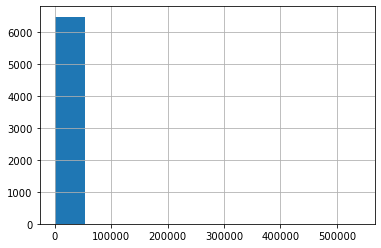

In [48]:
### See the distribution of COVID-19 Deaths

hist_price=df_combine["COVID_19_Deaths"].hist()
### We observe that most of the values are around 100,000

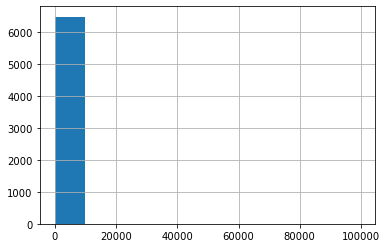

In [49]:
### Lets plot histogram for Covid 19 Deaths less than 100,000

hist_covid1=df_combine["COVID_19_Deaths"][df_combine["COVID_19_Deaths"]<100000].hist()

How many Covid Deaths more than 100,000?

In [50]:
df_combine[df_combine["COVID_19_Deaths"]>100000].shape

(4, 17)

we can see that only 4 listings have Covid deaths > 100,000. These are maybe outliers but they can be valid values as well because some places may have large values of covid deaths. so we will not remove them.

In [51]:
### We use 100,000 as threshold for covid deaths

df_combine=df_combine[df_combine["COVID_19_Deaths"]<100000]

### Looking at the Covid deaths column again
df_combine["COVID_19_Deaths"].describe()

count     6485.000000
mean       328.687624
std       2092.437176
min          0.000000
25%          0.000000
50%         16.000000
75%        497.384535
max      99454.000000
Name: COVID_19_Deaths, dtype: float64

### Now for Total_Deaths column 

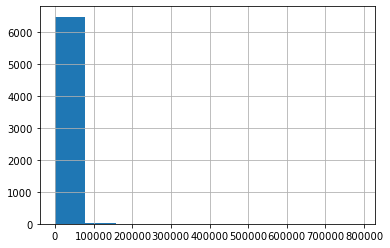

In [52]:
### See the distribution of Total_Deaths


hist_price=df_combine["Total_Deaths"].hist()
### We observe that most of the values are around 100,000

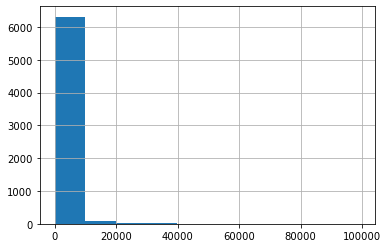

In [55]:
### Lets plot histogram for Covid 19 Deaths less than 100,000

hist_covid1=df_combine["Total_Deaths"][df_combine["Total_Deaths"]<100000].hist()

How many Covid Deaths more than 100,000?

In [56]:
df_combine[df_combine["Total_Deaths"]>100000].shape

(11, 17)

we can see that only 11 listings have total deaths > 100,000. These are maybe typing error during input. Nonetheless, since this records are skewing our data a lot, we will treat them as outliers and drop them

In [57]:
### We use 100,000 as threshold for covid deaths

df_combine=df_combine[df_combine["Total_Deaths"]<100000]

### Looking at the Covid deaths column again
df_combine["Total_Deaths"].describe()

count     6474.000000
mean      2054.102926
std       5063.005574
min          0.000000
25%         23.000000
50%        200.500000
75%       3914.085120
max      99118.000000
Name: Total_Deaths, dtype: float64

## Storing Structured Data into PostgreSQL

Postgresql connection was established by importing the psycopg2 package. For better ease of use, I have installed
Postgresql locally on virtual Machine, I was able to manage the interactions with the database.

In [2]:
#covid1

To automate the execution of the program A database named "healthdata" is created in master notebook. I will use that database here here 

#### A table named covid was created using appropriate SQL queries and data was read from the dataframe and inserted into PostgreSQL.

In [63]:

createString = """
CREATE TABLE IF NOT EXISTS covid(
    State VARCHAR,
    Age_group VARCHAR,
    Race_and_Hispanic_Origin_Group VARCHAR,
    COVID_19_Deaths integer,
    Total_Deaths integer,
    Pneumonia_Deaths integer,
    Pneumonia_and_COVID_19_Deaths integer,
    Influenza_Deaths integer,
    Pneumonia_Influenza_or_COVID_19_Deaths integer,
    Condition_Group VARCHAR,
    Condition VARCHAR, 
    COVID_19_Deaths_conditions integer,
    State_Cat integer,
    Age_group_Cat integer,
    Race_and_Hispanic_Origin_Group_Cat integer,
    Condition_Group_Cat integer, 
    Condition_Cat integer
);
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "healthdata")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [64]:
# Creating a list of tupples from the dataframe values
tpls = [tuple(x) for x in df_combine.to_numpy()]
    
# dataframe columns with Comma-separated
cols = ','.join(list(df_combine.columns))

#cols = 'State,"Age group","Race and Hispanic Origin Group","COVID-19 Deaths","Total Deaths","Pneumonia Deaths","Pneumonia and COVID-19 Deaths","Influenza Deaths,Pneumonia, Influenza, or COVID-19 Deaths","Condition Group",Condition,"COVID-19 Deaths_conditions",State_Cat,Age group_Cat,"Race and Hispanic Origin Group_Cat","Condition Group_Cat",Condition_Cat'
table = "covid"


# SQL query to execute

chksql_covid_a = "select case when (select 1 from  %s limit 1) = 1 then 1 else 0 end" % (table)
sql_covid_a = "INSERT INTO %s(%s) VALUES(%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s)" % (table, cols)

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "healthdata")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    tablechk = sqlio.read_sql_query(chksql_covid_a, dbConnection)
    if(tablechk['case'].sum() == 0):
        dbCursor = dbConnection.cursor()
        dbCursor.executemany(sql_covid_a, tpls)
        print("Data inserted using execute_many() successfully")
        dbCursor.close()
    elif(tablechk['case'].sum() > 0):
        print("Table is already loaded with data")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Data inserted using execute_many() successfully


In [65]:
sql = """
    SELECT * FROM covid;
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "healthdata")
    covid_df = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [66]:
covid_df.shape

(6474, 17)

In [67]:
pd.set_option('display.max_rows', covid_df.shape[0]+1)
covid_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,6474,54,Georgia,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_group,6474,16,25-34 years,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_and_hispanic_origin_group,6474,8,Non-Hispanic American Indian or Alaska Native,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
covid_19_deaths,6474,NaN,NaN,NaN,268.332,880.482,0,0,15.5,497,26238
total_deaths,6474,NaN,NaN,NaN,2054.08,5063,0,23,200.5,3914,99118
pneumonia_deaths,6474,NaN,NaN,NaN,249.37,700.674,0,0,21.5,451,18920
pneumonia_and_covid_19_deaths,6474,NaN,NaN,NaN,122.453,481.858,0,0,0,233,15359
influenza_deaths,6474,NaN,NaN,NaN,3.64705,12.7013,0,0,0,6.75,344
pneumonia_influenza_or_covid_19_deaths,6474,NaN,NaN,NaN,412.01,1112.66,0,0,41,736,29943
condition_group,6474,12,Circulatory diseases,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Descriptive Analysis of Data

Text(0, 0.5, 'Oredered value')

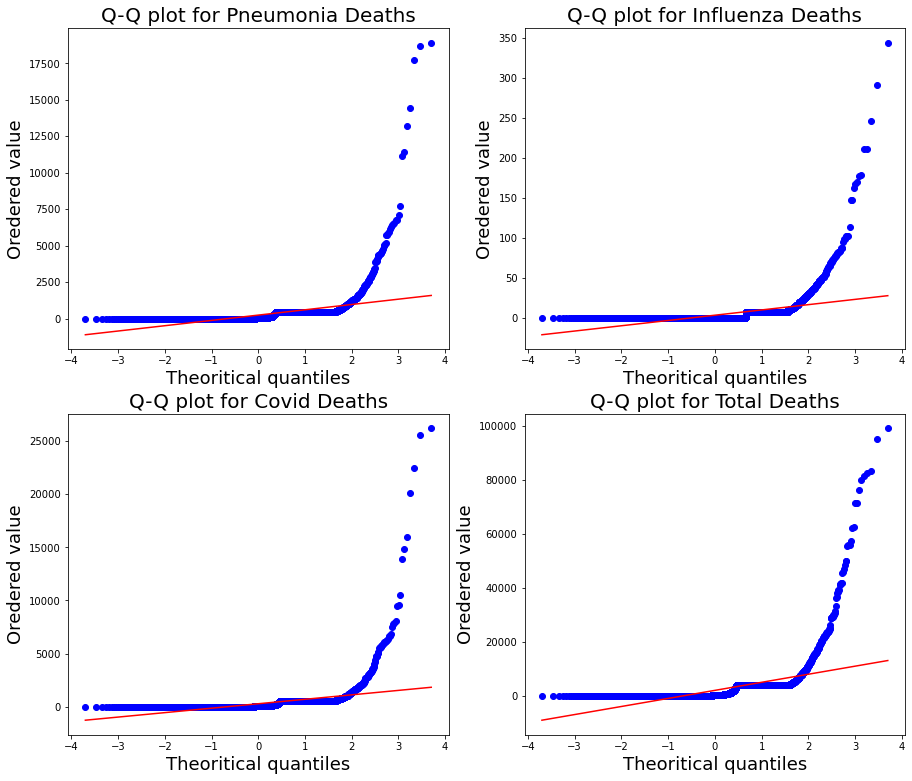

In [68]:
fig, ax = plt.subplots(figsize=(15, 13))
plt.subplot(2, 2, 1)
stats.probplot(covid_df['pneumonia_deaths'], dist="norm", plot=pylab)
plt.title("Q-Q plot for Pneumonia Deaths", fontsize=20)
#plt.xlabel('xlabel', fontsize=18)
plt.xlabel('Theoritical quantiles', fontsize=18)
plt.ylabel('Oredered value', fontsize=18)

plt.subplot(2, 2, 2)
stats.probplot(covid_df['influenza_deaths'], dist="norm", plot=pylab)
plt.title("Q-Q plot for Influenza Deaths",fontsize=20)
plt.xlabel('Theoritical quantiles', fontsize=18)
plt.ylabel('Oredered value', fontsize=18)

plt.subplot(2, 2, 3)
stats.probplot(covid_df['covid_19_deaths'], dist="norm", plot=pylab)
plt.title("Q-Q plot for Covid Deaths",fontsize=20)
plt.xlabel('Theoritical quantiles', fontsize=18)
plt.ylabel('Oredered value', fontsize=18)

plt.subplot(2, 2, 4)
stats.probplot(covid_df['total_deaths'], dist="norm", plot=pylab)
plt.title("Q-Q plot for Total Deaths", fontsize=20)
plt.xlabel('Theoritical quantiles', fontsize=18)
plt.ylabel('Oredered value', fontsize=18)

The Q-Q plots of influenza, pneumonia, Covid-19 and totals deaths shows that there is not normal distribution in these attributes ideally it should be straight diagonal line. The graph also illustrate the potential outliers in data but as per context they maybe not outliers because there might be some exception in deaths in some situation

#### Scatter Plot with trend Line of Covid-19 deaths vs influenza deaths

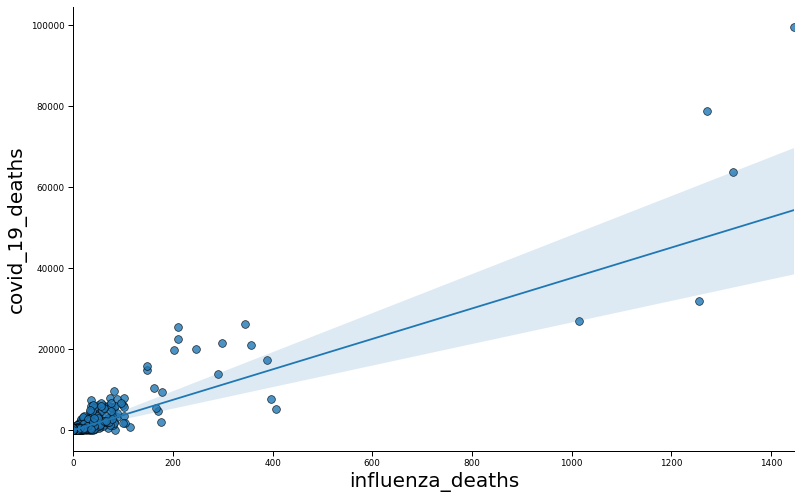

In [76]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.lmplot(x="influenza_deaths", y="covid_19_deaths", data=covid_df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

#### Scatter Plot with trend Line of Covid-19 deaths vs pneumonia deaths

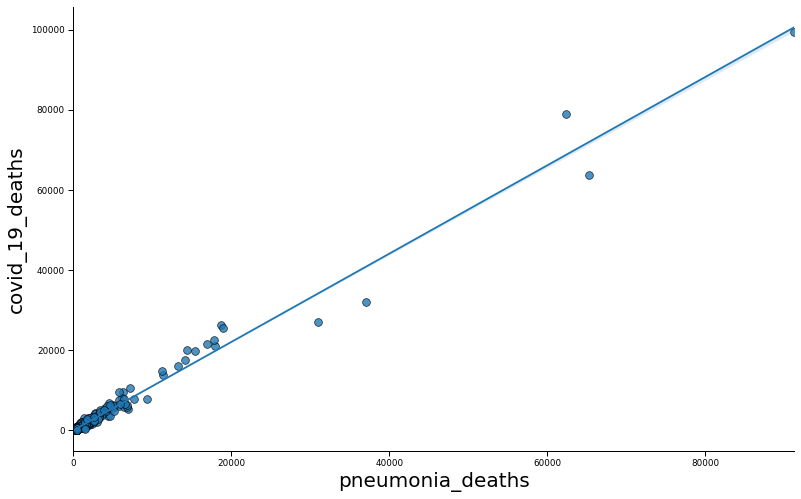

In [75]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.lmplot(x="pneumonia_deaths", y="covid_19_deaths", data=covid_df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))


### Disease condition group with respect to race aged between 0 t 64 in top 5 state of the US

In [69]:
covid_df.condition_group.unique()

array(['Respiratory diseases', 'Circulatory diseases', 'Sepsis',
       'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease',
       'Vascular and unspecified dementia', 'Renal failure',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'All other conditions and causes (residual)', 'COVID-19'],
      dtype=object)

In [70]:
df1=covid_df[covid_df['age_group'].isin(['0-17 years','18-29 years','30-49 years','50-64 years'])]
df2=df1[df1['state'].isin(['California','Florida','Texas','New York','Pennsylvania'])]
df3=df2[df2['race_and_hispanic_origin_group'].isin(['Non-Hispanic White', 'Non-Hispanic Black','Non-Hispanic Asian'])]
df4=df3[df3['condition_group'].isin(['Respiratory diseases', 'Circulatory diseases', 'Sepsis','Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease','Renal failure'])]

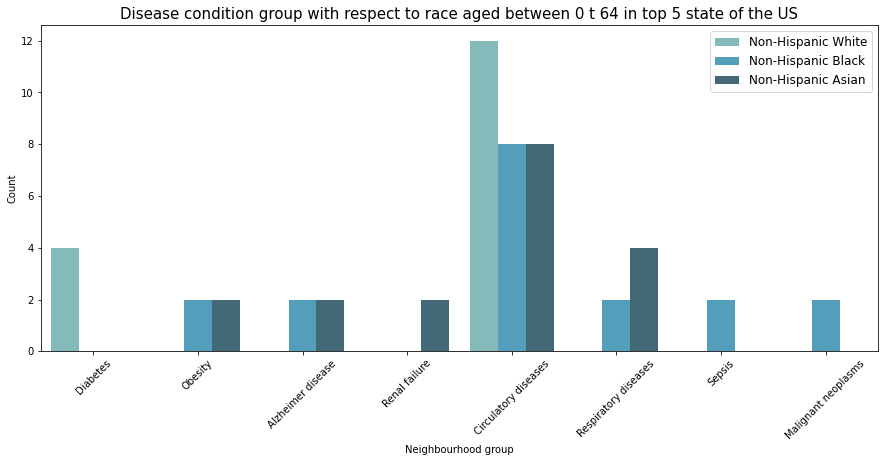

In [71]:
plt.figure(figsize=(15,6))

sns.countplot(data=df4, x='condition_group', hue='race_and_hispanic_origin_group', palette='GnBu_d')
#sns.countplot(data=df2, hue='race_and_hispanic_origin_group', x='age_group', palette='GnBu_d')
plt.title('Disease condition group with respect to race aged between 0 t 64 in top 5 state of the US', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(fontsize=12)